# Support Vector Machine (SVM)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mushroom = pd.read_csv("C:\\Users\\HEMANJALI MULI\\Downloads\\SVM\\SVM\\mushroom.csv")
mushroom

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1995        attached      crowded    narrow  chocolate  ...    partial   
1996        attached      distant    narrow        red  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number   ring_type spore_print_color population  habitat  \
0         brown         two   sheathing         chocolate  clustered    waste   
1         brown         two   sheathing             brown   numerous    waste   
2        yellow         two   sheathing            purple   abundant    waste   
3        yellow         two    cobwebby             green  clustered  grasses   
4         white        none        none            yellow  clustered    urban   
...         ...         ...         ...               ...        ...      ...   
1995     orange         one     flaring            purple   abundant   leaves   
1996      white         one        zone            yellow   numerous    waste   
1997      brown         two  evanescent            yellow   abundant    woods   
1998     yellow         one    cobwebby             brown   solitary    woods   
1999      white         two       large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1995  poisonous     5.877891    17.464145  
1996  poisonous     6.500840    13.501957  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  
1999  poisonous    13.066414    21.056642  

[2000 rows x 26 columns]

In [3]:
mushroom.dtypes

Unnamed: 0                    int64
cap_shape                    object
cap_surface                  object
cap_color                    object
bruises                      object
odor                         object
gill_attachment              object
gill_spacing                 object
gill_size                    object
gill_color                   object
stalk_shape                  object
stalk_root                   object
stalk_surface_above_ring     object
stalk_surface_below_ring     object
stalk_color_above_ring       object
stalk_color_below_ring       object
veil_type                    object
veil_color                   object
ring_number                  object
ring_type                    object
spore_print_color            object
population                   object
habitat                      object
class                        object
stalk_height                float64
cap_diameter                float64
dtype: object

In [4]:
mushroom.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

In [5]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

# Data Preprocessing

In [6]:
from sklearn import preprocessing

In [9]:
# converting categorical variables to numeric
label_encoder = preprocessing.LabelEncoder()
mushroom['cap_shape']= label_encoder.fit_transform(mushroom['cap_shape'])
mushroom['cap_surface']= label_encoder.fit_transform(mushroom['cap_surface'])
mushroom['cap_color']= label_encoder.fit_transform(mushroom['cap_color'])
mushroom['bruises']= label_encoder.fit_transform(mushroom['bruises'])
mushroom['odor']= label_encoder.fit_transform(mushroom['odor'])
mushroom['gill_attachment']= label_encoder.fit_transform(mushroom['gill_attachment'])
mushroom['gill_spacing']= label_encoder.fit_transform(mushroom['gill_spacing'])
mushroom['gill_size']= label_encoder.fit_transform(mushroom['gill_size'])
mushroom['gill_color']= label_encoder.fit_transform(mushroom['gill_color'])
mushroom['stalk_shape']= label_encoder.fit_transform(mushroom['stalk_shape'])
mushroom['stalk_root']= label_encoder.fit_transform(mushroom['stalk_root'])
mushroom['stalk_surface_above_ring']= label_encoder.fit_transform(mushroom['stalk_surface_above_ring'])
mushroom['stalk_surface_below_ring']= label_encoder.fit_transform(mushroom['stalk_surface_below_ring'])
mushroom['stalk_color_above_ring']= label_encoder.fit_transform(mushroom['stalk_color_above_ring'])
mushroom['stalk_color_below_ring']= label_encoder.fit_transform(mushroom['stalk_color_below_ring'])
mushroom['veil_type']= label_encoder.fit_transform(mushroom['veil_type'])
mushroom['veil_color']= label_encoder.fit_transform(mushroom['veil_color'])
mushroom['ring_number']= label_encoder.fit_transform(mushroom['ring_number'])
mushroom['ring_type']= label_encoder.fit_transform(mushroom['ring_type'])
mushroom['spore_print_color']= label_encoder.fit_transform(mushroom['spore_print_color'])
mushroom['population']= label_encoder.fit_transform(mushroom['population'])
mushroom['habitat']= label_encoder.fit_transform(mushroom['habitat'])
mushroom['class']= label_encoder.fit_transform(mushroom['class'])

In [10]:
mushroom

Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0           1167          4            2          7        0     1   
1           1037          4            0          6        0     1   
2            309          3            1          5        1     4   
3            282          0            2          4        1     3   
4            820          3            3          8        1     5   
...          ...        ...          ...        ...      ...   ...   
1995         863          4            2          0        1     4   
1996        1160          4            2          5        1     5   
1997         265          2            1          3        1     3   
1998         411          0            3          7        0     7   
1999        1073          2            2          8        1     7   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                   1             2          0           7  ...          0   
1                   3             1          1           3  ...          1   
2                   1             1          0           8  ...          1   
3                   3             0          0           6  ...          0   
4                   2             1          1           6  ...          1   
...               ...           ...        ...         ...  ...        ...   
1995                0             1          1           3  ...          0   
1996                0             2          1           9  ...          0   
1997                3             0          1           7  ...          0   
1998                2             0          1           6  ...          1   
1999                1             0          1           8  ...          0   

      veil_color  ring_number  ring_type  spore_print_color  population  \
0              0            2          6                  3           1   
1              0            2          6                  1           2   
2              3            2          6                  6           0   
3              3            2          0                  4           1   
4              2            0          4                  8           1   
...          ...          ...        ...                ...         ...   
1995           1            1          2                  6           0   
1996           2            1          7                  8           2   
1997           0            2          1                  8           0   
1998           3            1          0                  1           5   
1999           2            2          3                  7           2   

      habitat  class  stalk_height  cap_diameter  
0           5      1     14.276173      5.054983  
1           5      0      3.952715     19.068319  
2           5      1      9.054265      7.205884  
3           0      1      5.226499     20.932692  
4           4      1     14.037532     12.545245  
...       ...    ...           ...           ...  
1995        1      1      5.877891     17.464145  
1996        5      1      6.500840     13.501957  
1997        6      1     13.558064     11.270020  
1998        6      1     11.092703      8.423199  
1999        4      1     13.066414     21.056642  

[2000 rows x 26 columns]

# Data Visualization

In [11]:
mushroom.hist(figsize=(12, 10))
plt.show()

<Axes: ylabel='Density'>

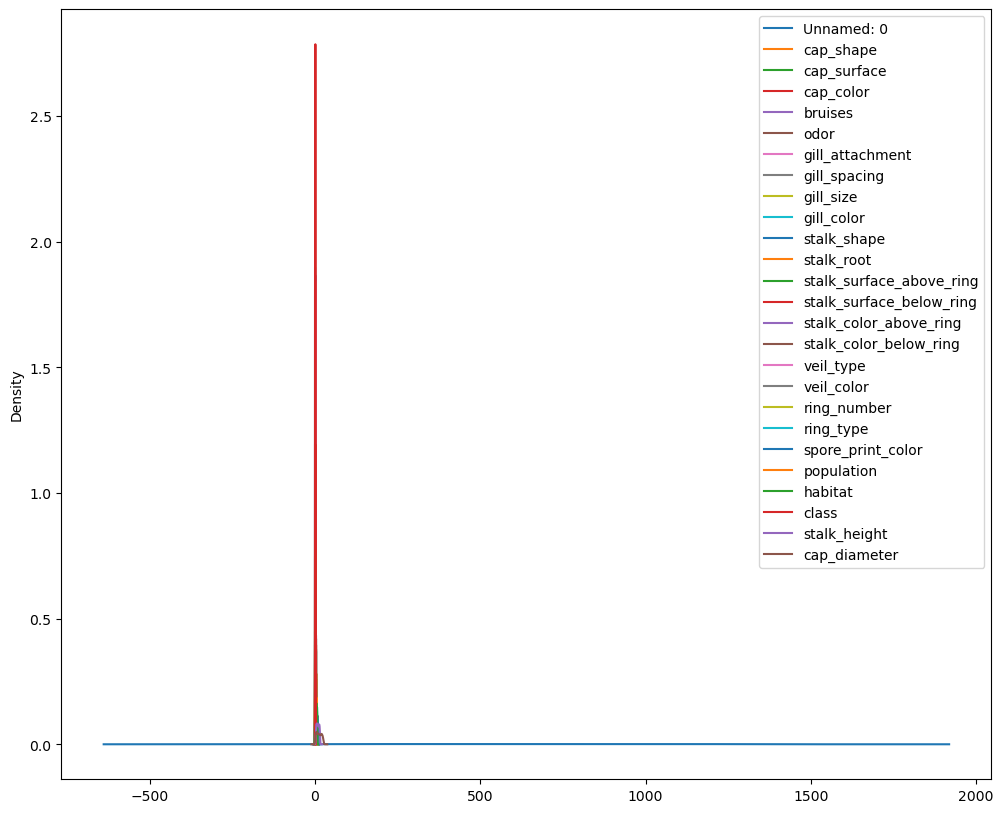

In [12]:
mushroom.plot.density(figsize=(12, 10))

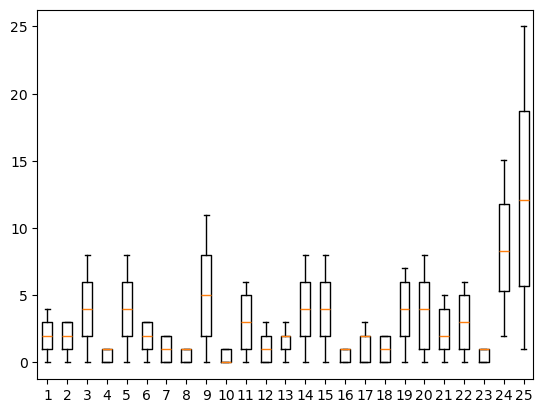

In [13]:
box=mushroom.drop(['Unnamed: 0'],axis=1)
plt.boxplot(box)
plt.show()

In [14]:
plt.boxplot(mushroom['Unnamed: 0'])
plt.show()

In [15]:
plt.boxplot(mushroom['stalk_height'])
plt.show()

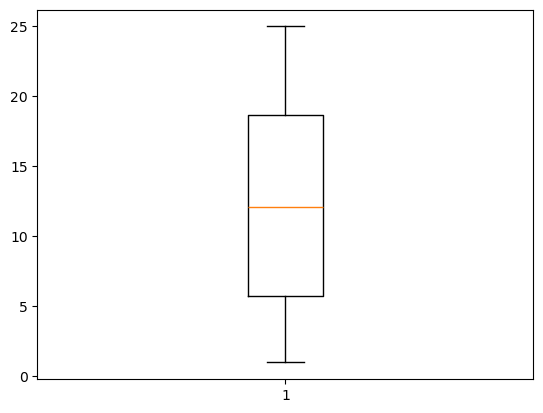

In [16]:
plt.boxplot(mushroom['cap_diameter'])
plt.show()

In [17]:
mushroom.corr()

Unnamed: 0  cap_shape  cap_surface  cap_color  \
Unnamed: 0                  1.000000   0.076872    -0.018136   0.024111   
cap_shape                   0.076872   1.000000    -0.003244   0.009615   
cap_surface                -0.018136  -0.003244     1.000000   0.003153   
cap_color                   0.024111   0.009615     0.003153   1.000000   
bruises                    -0.046627  -0.001190    -0.021352   0.016445   
odor                       -0.012730  -0.030119    -0.021926  -0.065410   
gill_attachment            -0.005051   0.015477    -0.010513   0.023835   
gill_spacing                0.048191  -0.048783     0.068918  -0.015628   
gill_size                  -0.022992   0.040497    -0.038490   0.009888   
gill_color                  0.038452   0.032123     0.045561  -0.005898   
stalk_shape                -0.022255   0.011573    -0.024032  -0.020397   
stalk_root                  0.013280   0.057405    -0.008284  -0.004423   
stalk_surface_above_ring   -0.061770  -0.030537     0.016799  -0.019983   
stalk_surface_below_ring   -0.097594  -0.000870    -0.000493   0.000528   
stalk_color_above_ring     -0.019583  -0.021350    -0.048534   0.038920   
stalk_color_below_ring      0.014746   0.027522    -0.011742   0.036951   
veil_type                   0.019658  -0.039029    -0.068705  -0.020039   
veil_color                 -0.048383  -0.017399     0.040341  -0.036166   
ring_number                -0.067070   0.036999     0.005855   0.055593   
ring_type                   0.022166   0.010172     0.017616   0.021509   
spore_print_color          -0.003308   0.024596    -0.042134   0.082155   
population                  0.018726   0.003602    -0.003963  -0.027551   
habitat                     0.051532   0.028388    -0.038661  -0.025568   
class                       0.005902   0.001140    -0.046409  -0.078029   
stalk_height               -0.001508   0.024540     0.043482   0.044086   
cap_diameter                0.051881   0.037743     0.016606  -0.000489   

                           bruises      odor  gill_attachment  gill_spacing  \
Unnamed: 0               -0.046627 -0.012730        -0.005051      0.048191   
cap_shape                -0.001190 -0.030119         0.015477     -0.048783   
cap_surface              -0.021352 -0.021926        -0.010513      0.068918   
cap_color                 0.016445 -0.065410         0.023835     -0.015628   
bruises                   1.000000  0.026274         0.009402     -0.004458   
odor                      0.026274  1.000000        -0.055214     -0.002847   
gill_attachment           0.009402 -0.055214         1.000000     -0.063604   
gill_spacing             -0.004458 -0.002847        -0.063604      1.000000   
gill_size                 0.041851 -0.027313         0.009386     -0.022650   
gill_color               -0.035135 -0.051793         0.035279     -0.010729   
stalk_shape               0.007928  0.009072        -0.018698      0.051041   
stalk_root               -0.014604 -0.005430        -0.013484      0.000668   
stalk_surface_above_ring -0.043735  0.063281        -0.021187     -0.031336   
stalk_surface_below_ring -0.013857  0.005568        -0.009479     -0.043794   
stalk_color_above_ring    0.009374 -0.006393         0.011811     -0.045491   
stalk_color_below_ring   -0.077316 -0.007103         0.007839      0.003012   
veil_type                 0.016775  0.028177        -0.042727     -0.016567   
veil_color               -0.053680  0.015397        -0.023648      0.004960   
ring_number              -0.022588 -0.068819         0.080437      0.024984   
ring_type                -0.028750  0.033956        -0.006025      0.001516   
spore_print_color        -0.026481 -0.057705         0.039356      0.016376   
population                0.012976 -0.011753        -0.002649     -0.004920   
habitat                   0.013392 -0.051237         0.005944      0.004055   
class                    -0.015498  0.039536        -0.028194      0.046505   
stalk_height             

<Axes: >

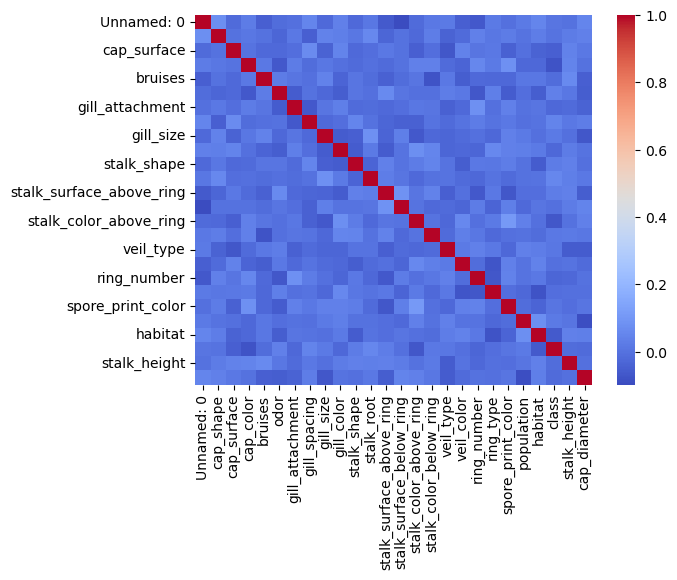

In [18]:
sns.heatmap(mushroom.corr(),cmap='coolwarm')

In [30]:
import warnings
warnings.filterwarnings('ignore')

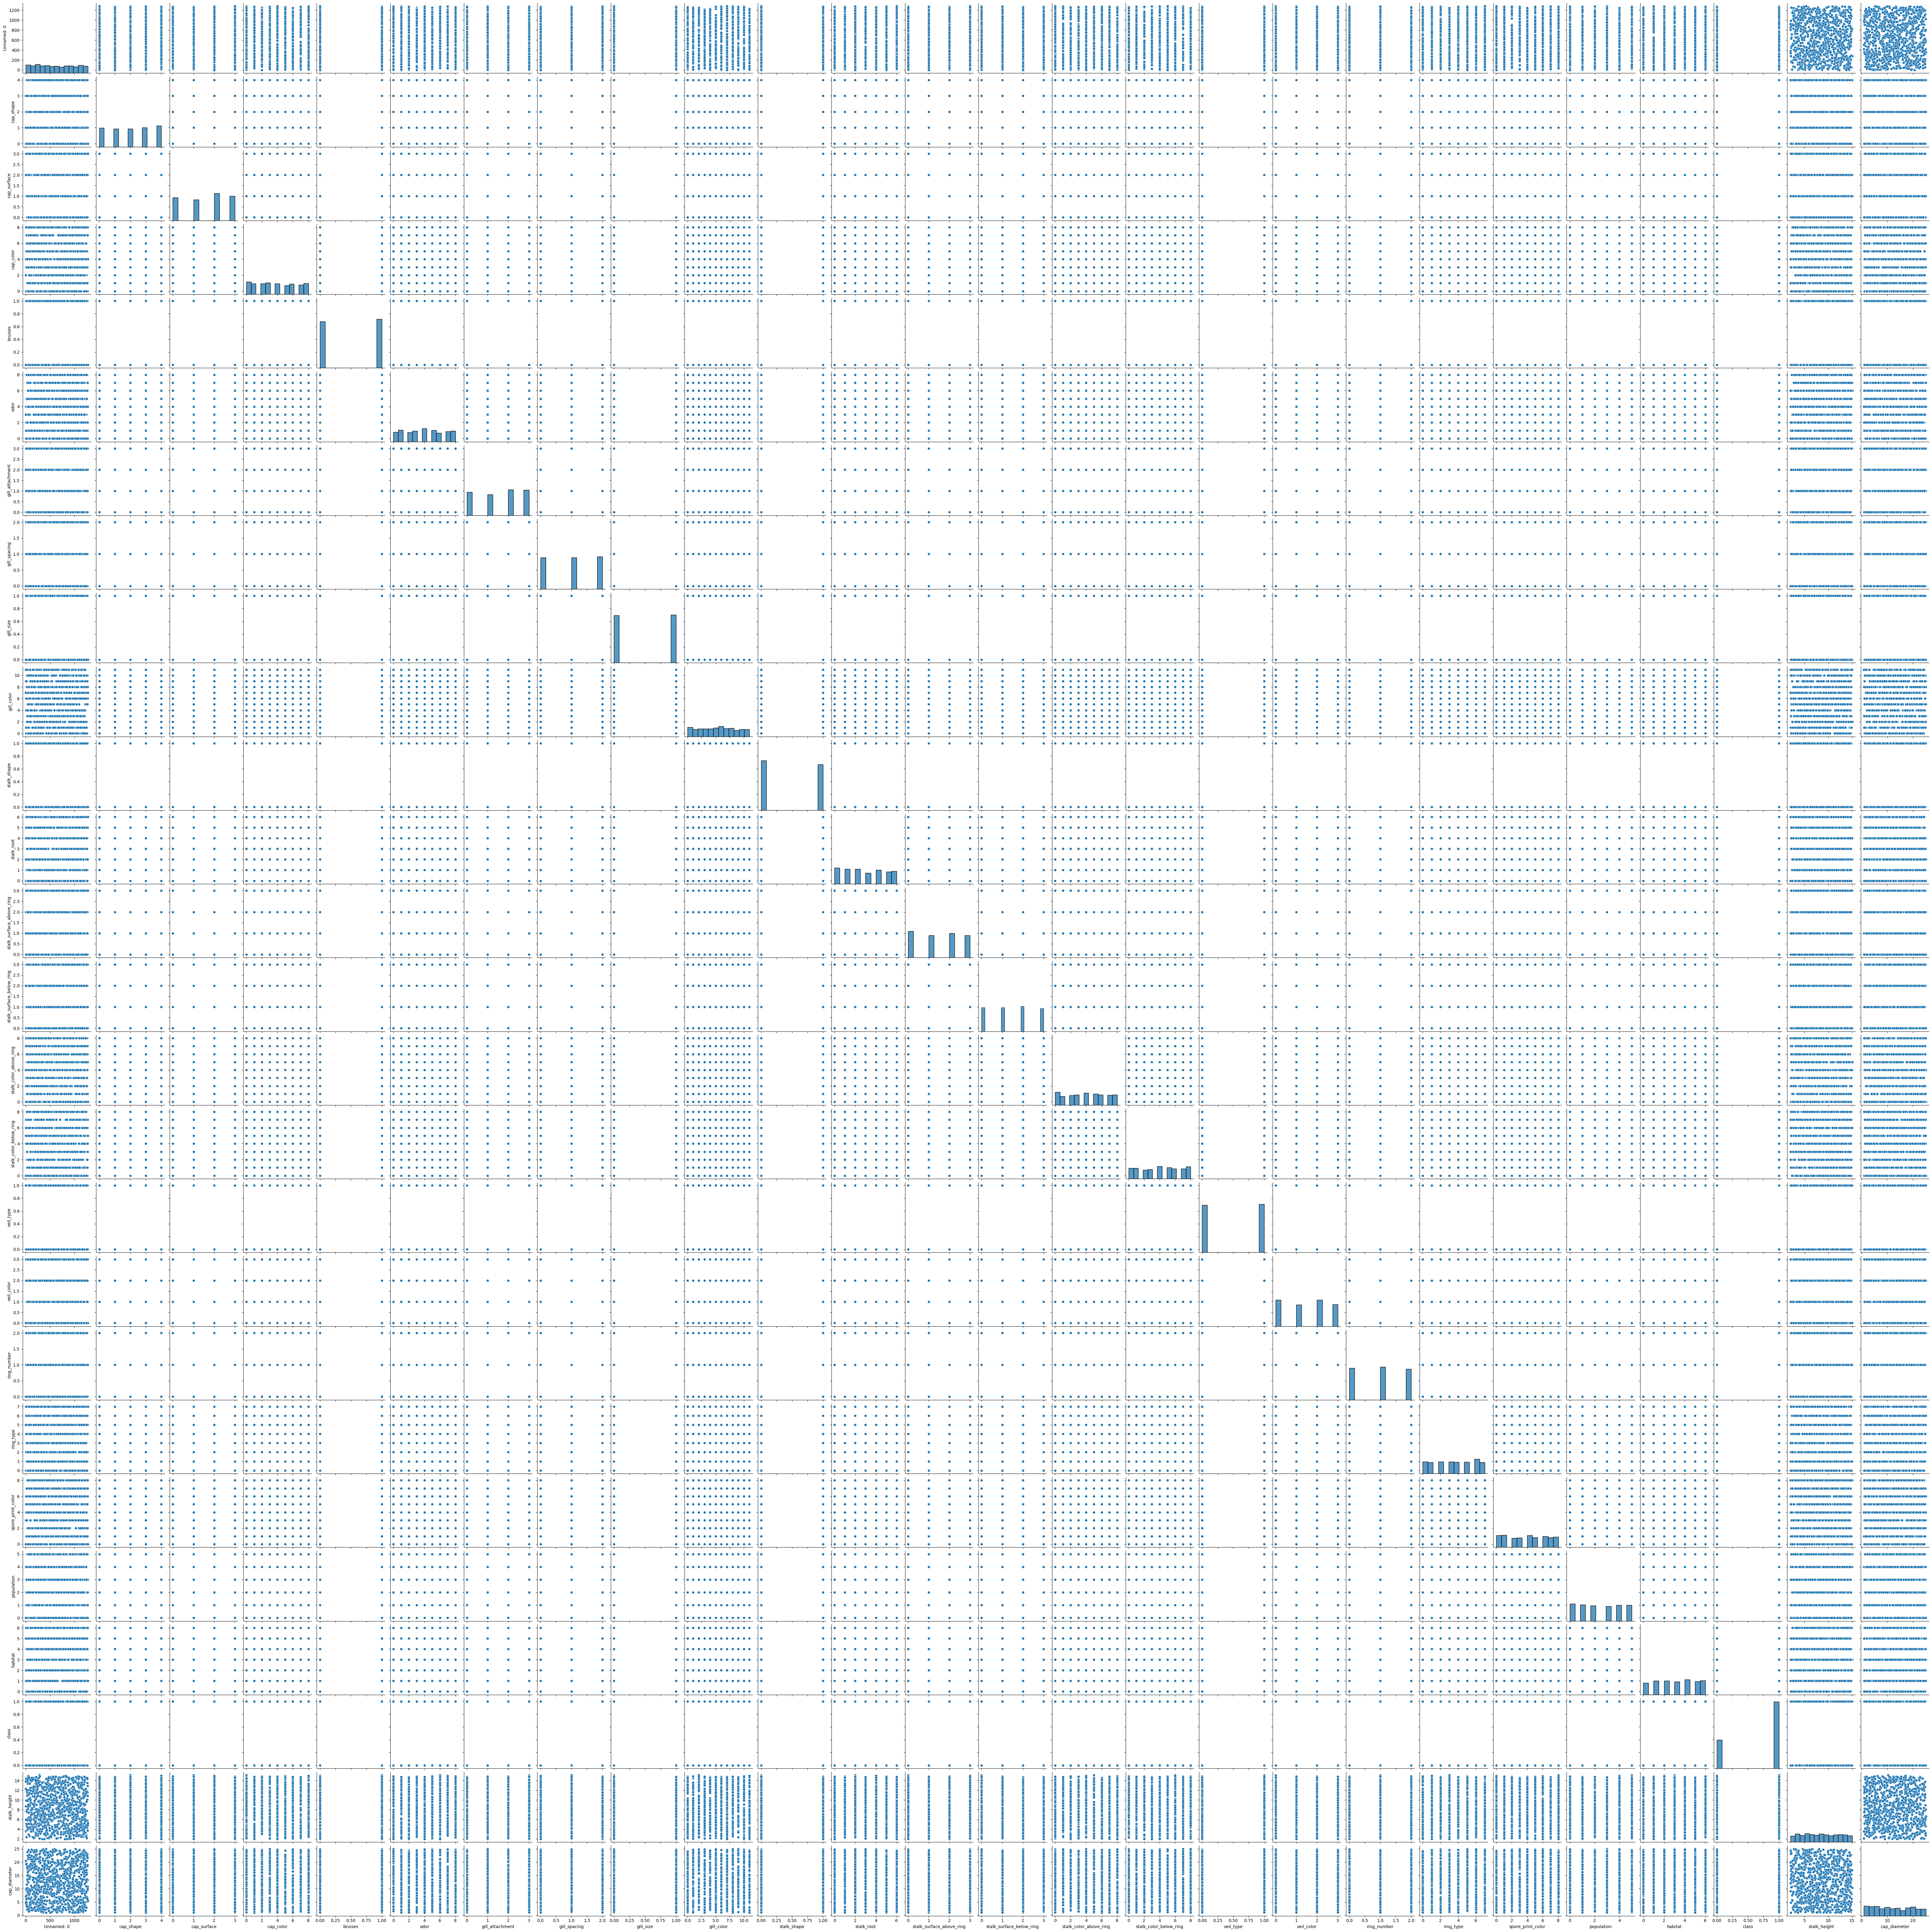

In [31]:
sns.pairplot(mushroom)
plt.show()

<Axes: xlabel='class'>

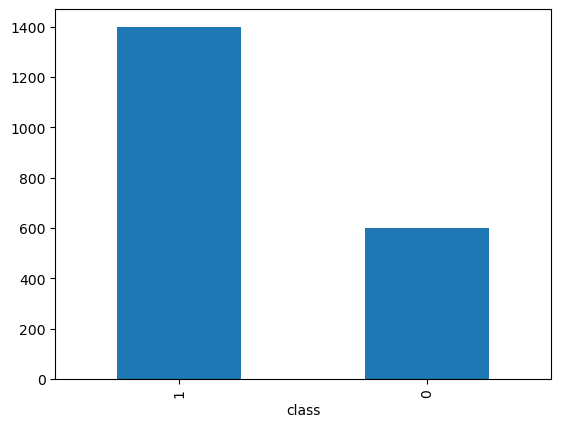

In [32]:
mushroom['class'].value_counts().plot(kind = "bar")

In [33]:
X = mushroom.drop(['class'],axis=1)
Y = mushroom["class"]

In [34]:
X

Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0           1167          4            2          7        0     1   
1           1037          4            0          6        0     1   
2            309          3            1          5        1     4   
3            282          0            2          4        1     3   
4            820          3            3          8        1     5   
...          ...        ...          ...        ...      ...   ...   
1995         863          4            2          0        1     4   
1996        1160          4            2          5        1     5   
1997         265          2            1          3        1     3   
1998         411          0            3          7        0     7   
1999        1073          2            2          8        1     7   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  \
0                   1             2          0           7  ...   
1                   3             1          1           3  ...   
2                   1             1          0           8  ...   
3                   3             0          0           6  ...   
4                   2             1          1           6  ...   
...               ...           ...        ...         ...  ...   
1995                0             1          1           3  ...   
1996                0             2          1           9  ...   
1997                3             0          1           7  ...   
1998                2             0          1           6  ...   
1999                1             0          1           8  ...   

      stalk_color_below_ring  veil_type  veil_color  ring_number  ring_type  \
0                          8          0           0            2          6   
1                          0          1           0            2          6   
2                          3          1           3            2          6   
3                          5          0           3            2          0   
4                          7          1           2            0          4   
...                      ...        ...         ...          ...        ...   
1995                       4          0           1            1          2   
1996                       4          0           2            1          7   
1997                       6          0           0            2          1   
1998                       5          1           3            1          0   
1999                       0          0           2            2          3   

      spore_print_color  population  habitat  stalk_height  cap_diameter  
0                     3           1        5     14.276173      5.054983  
1                     1           2        5      3.952715     19.068319  
2                     6           0        5      9.054265      7.205884  
3                     4           1        0      5.226499     20.932692  
4                     8           1        4     14.037532     12.545245  
...                 ...         ...      ...           ...           ...  
1995                  6           0        1      5.877891     17.464145  
1996                  8           2        5      6.500840     13.501957  
1997                  8           0        6     13.558064     11.270020  
1998                  1           5        6     11.092703      8.423199  
1999                  7           2        4     13.066414     21.056642  

[2000 rows x 25 columns]

In [35]:
Y

0       1
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    1
1998    1
1999    1
Name: class, Length: 2000, dtype: int32

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1600, 25) (400, 25) (1600,) (400,)


# SVM Implementation

In [37]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [39]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       115
           1       0.71      1.00      0.83       285

    accuracy                           0.71       400
   macro avg       0.36      0.50      0.42       400
weighted avg       0.51      0.71      0.59       400



In [42]:
np.mean(preds==y_test)

0.7125

# Parameter Tuning and Optimization

In [43]:
clf = SVC()
param_grid = [{'kernel':['rbf','polynomial','radial'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5],
                          'kernel': ['rbf', 'polynomial', 'radial']}])

In [44]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'rbf'}, 0.878125)

# Comparison and Analysis

In [45]:
# Compare SVM performance with different kernels
for kernel in ['linear', 'poly', 'rbf']:
    svm_classifier = SVC(kernel=kernel, C=1.0, random_state=42)
    svm_classifier.fit(x_train, y_train)
    y_pred = svm_classifier.predict(x_test)
    print(f"Kernel: {kernel}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Kernel: linear
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       115
           1       0.71      1.00      0.83       285

    accuracy                           0.71       400
   macro avg       0.36      0.50      0.42       400
weighted avg       0.51      0.71      0.59       400

Confusion Matrix:
 [[  0 115]
 [  0 285]]
Kernel: poly
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       115
           1       0.71      1.00      0.83       285

    accuracy                           0.71       400
   macro avg       0.36      0.50      0.42       400
weighted avg       0.51      0.71      0.59       400

Confusion Matrix:
 [[  0 115]
 [  0 285]]
Kernel: rbf
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       115
           1       0.71      1.00      0.

## SVM Kernel Comparison:
Linear Kernel: Fast and effective for linearly separable data.
Polynomial Kernel: Captures more complex relationships; useful for non-linear patterns.
RBF Kernel: Most flexible; good for complex, non-linear decision boundaronal constraints.
## SVM Strengths and Weaknesses:
Strengths: Effective in high-dimensional spaces, flexible with different kernels, robust against overfitting.
Weaknesses: Sensitive to parameter selection and feature scaling, less interpretable, can be computationally expensive for large datasets.
### Practical Implications:
SVM is versatile across domains (e.g., text, images, bioinformatics).
Suitable for small to medium-sized datasets with high-dimensional data.
Not ideal for very large datasets due to scalability and computational constraints.